<a href="https://colab.research.google.com/github/CsCs1984/Health-care-projects/blob/main/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import pandas as pd
import numpy as np
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import os, sys, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from keras_preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import BatchNormalization
from keras.layers import Conv2D
from keras.models import Model
from keras.applications import Xception
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LambdaCallback
from keras.callbacks import Callback
from keras import metrics
from keras.optimizers import Adam,SGD
from keras import backend as K
import tensorflow as tf
import keras
from imgaug import augmenters as iaa
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization
from keras.applications.resnet50 import preprocess_input, decode_predictions

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/train.csv')

# spliting label column
df["Label"] = df["Label"].str.split("|")

# class labels
class_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18']

# binarizing each label/class
for label in tqdm(class_labels):
    df[label] = df['Label'].map(lambda result: 1 if label in result else 0)

# rename column
df.columns = ['ID', 'Label', 'Nucleoplasm', 'Nuclear membrane', 'Nucleoli', 'Nucleoli fibrillar center',
                    'Nuclear speckles', 'Nuclear bodies', 'Endoplasmic reticulum', 'Golgi apparatus', 'Intermediate filaments',
                    'Actin filaments', 'Microtubules', 'Mitotic spindle', 'Centrosome', 'Plasma membrane', 'Mitochondria',
                    'Aggresome', 'Cytosol', 'Vesicles and punctate cytosolic patterns', 'Negative']

df






100%|██████████| 19/19 [00:00<00:00, 110.41it/s]


,ID,Label,Nucleoplasm,Nuclear membrane,Nucleoli,Nucleoli fibrillar center,Nuclear speckles,Nuclear bodies,Endoplasmic reticulum,Golgi apparatus,Intermediate filaments,Actin filaments,Microtubules,Mitotic spindle,Centrosome,Plasma membrane,Mitochondria,Aggresome,Cytosol,Vesicles and punctate cytosolic patterns,Negative
0,5c27f04c-bb99-11e8-b2b9-ac1f6b6435d0,"[8, 5, 0]",1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1,5fb643ee-bb99-11e8-b2b9-ac1f6b6435d0,"[14, 0]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,60b57878-bb99-11e8-b2b9-ac1f6b6435d0,"[6, 1]",0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,5c1a898e-bb99-11e8-b2b9-ac1f6b6435d0,"[16, 10]",0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,5b931256-bb99-11e8-b2b9-ac1f6b6435d0,"[14, 0]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21801,dd0989c4-bbca-11e8-b2bc-ac1f6b6435d0,[14],0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
21802,dd1f7fb8-bbca-11e8-b2bc-ac1f6b6435d0,"[3, 0]",1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21803,dd5cb36a-bbca-11e8-b2bc-ac1f6b6435d0,"[14, 0]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
21804,df573730-bbca-11e8-b2bc-ac1f6b6435d0,[14],0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
def append_ext(fn):
    return fn+".png"

df["ID"]=df["ID"].apply(append_ext)

In [ ]:
columns = [ 'Nucleoplasm', 'Nuclear membrane', 'Nucleoli', 'Nucleoli fibrillar center',
                    'Nuclear speckles', 'Nuclear bodies', 'Endoplasmic reticulum', 'Golgi apparatus', 'Intermediate filaments',
                    'Actin filaments', 'Microtubules', 'Mitotic spindle', 'Centrosome', 'Plasma membrane', 'Mitochondria',
                    'Aggresome', 'Cytosol', 'Vesicles and punctate cytosolic patterns', 'Negative']

In [ ]:
datagen=ImageDataGenerator(preprocessing_function=preprocess_input,validation_split=0.25)

train_generator=datagen.flow_from_dataframe(
dataframe=df,
directory="/content/gdrive/MyDrive/Training/Training",
x_col="ID",
y_col=columns,
subset="training",
batch_size=30,
seed=42,
class_mode="raw",
target_size=(299,299))
valid_generator=datagen.flow_from_dataframe(
dataframe=df,
directory="/content/gdrive/MyDrive/Training/Training",
x_col="ID",
y_col=columns,
subset="validation",
batch_size=30,
seed=42,
class_mode="raw",
target_size=(299,299))

Found 10001 validated image filenames.
Found 3333 validated image filenames.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


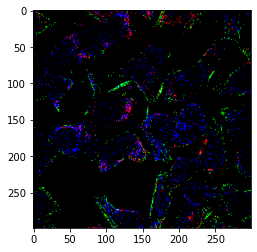

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


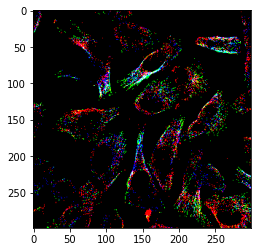

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


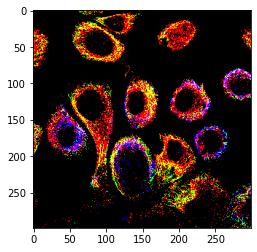

In [ ]:

from keras.preprocessing import image
import matplotlib.pyplot as plt

x,y = train_generator.next()
for i in range(0,3):
    image = x[i]
    label = y[i]
    plt.imshow(image)
    plt.show()

In [ ]:
test_generator=datagen.flow_from_dataframe(
dataframe=df,
directory="/content/gdrive/MyDrive/Training/Training",
x_col="ID",
y_col=columns ,
subset="validation",
batch_size=1,
class_mode="raw",
target_size=(299,299))

Found 3333 validated image filenames.


In [ ]:
import os, sys, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [ ]:
x,y=test_generator.next()
x.shape

(1, 299, 299, 3)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import BatchNormalization
from keras.layers import Conv2D
from keras.models import Model
from keras.applications import InceptionResNetV2
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LambdaCallback
from keras.callbacks import Callback
from keras import metrics
from keras.optimizers import Adam,SGD, Adamax
from keras import backend as K
import tensorflow as tf
import keras

In [ ]:
def f1(y_true, y_pred):
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
    return K.mean(f1)

In [ ]:
def show_history(history):
    fig, ax = plt.subplots(1, 3, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('f1')
    ax[1].plot(history.epoch, history.history["f1"], label="Train f1")
    ax[1].plot(history.epoch, history.history["val_f1"], label="Validation f1")
    ax[2].set_title('acc')
    ax[2].plot(history.epoch, history.history["acc"], label="Train acc")
    ax[2].plot(history.epoch, history.history["val_acc"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()
    ax[2].legend()

In [ ]:
def create_model(input_shape, n_out):
  pretrain_model = InceptionResNetV2(include_top=False, weights='imagenet', input_shape=input_shape)
  x = pretrain_model.output
  x = GlobalAveragePooling2D()(x)
  x = Dense(1024, activation='relu')(x)
  predictions = Dense(n_out, activation='softmax')(x)
  model = Model(inputs=pretrain_model.input, outputs=predictions)
  return model

In [ ]:
keras.backend.clear_session()
model = create_model(
    input_shape=(299,299,3),
    n_out=19)
model.summary()

219062272/219055592 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
___________________________

In [ ]:
from keras.optimizers import Adamax

#checkpointer = ModelCheckpoint(
   # '/kaggle/working/InceptionResNetV2.model',
   # verbose=2, save_best_only=True)

model.layers[2].trainable = False

model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adamax(lr=0.00001),metrics=['acc', f1])

In [ ]:
history = model.fit(train_generator, validation_data=next(valid_generator),steps_per_epoch=300, verbose=1,epochs=20)

Epoch 1/20
300/300 [==============================] - 322s 1s/step - loss: 0.2310 - acc: 0.4008 - f1: 0.0763 - val_loss: 0.2044 - val_acc: 0.4667 - val_f1: 0.0831
Epoch 2/20
300/300 [==============================] - 321s 1s/step - loss: 0.2223 - acc: 0.4054 - f1: 0.0857 - val_loss: 0.1980 - val_acc: 0.4667 - val_f1: 0.0892
Epoch 3/20
300/300 [==============================] - 321s 1s/step - loss: 0.2149 - acc: 0.4139 - f1: 0.0951 - val_loss: 0.1938 - val_acc: 0.5333 - val_f1: 0.0941
Epoch 4/20
300/300 [==============================] - 321s 1s/step - loss: 0.2093 - acc: 0.4226 - f1: 0.1044 - val_loss: 0.1918 - val_acc: 0.5333 - val_f1: 0.0979
Epoch 5/20
300/300 [==============================] - 321s 1s/step - loss: 0.2032 - acc: 0.4343 - f1: 0.1131 - val_loss: 0.1883 - val_acc: 0.5333 - val_f1: 0.1034
Epoch 6/20
300/300 [==============================] - 322s 1s/step - loss: 0.1987 - acc: 0.4553 - f1: 0.1204 - val_loss: 0.1861 - val_acc: 0.5667 - val_f1: 0.1095
Epoch 7/20
300/300 [==

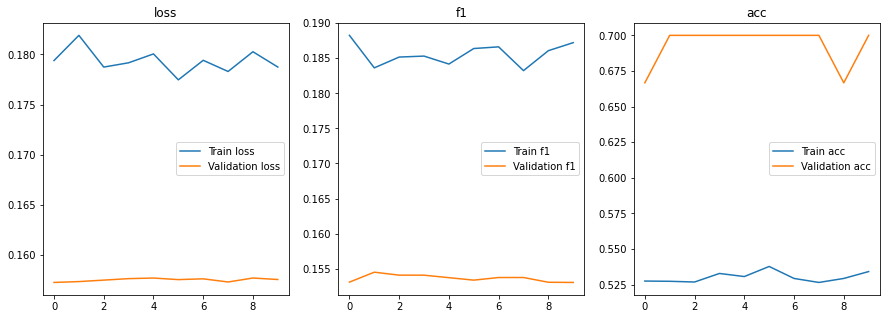

In [ ]:
show_history(history)